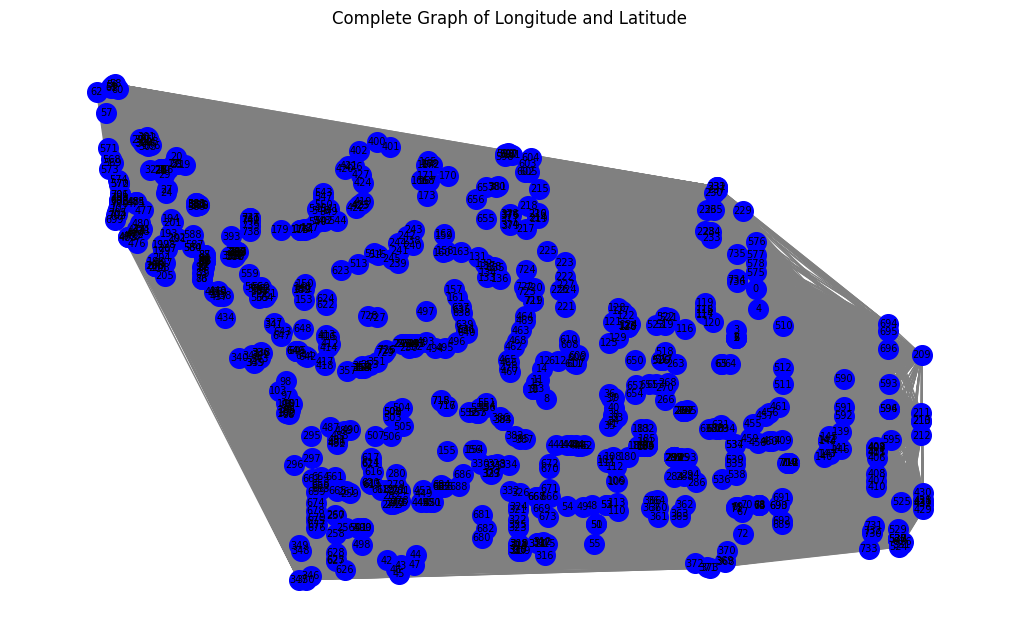

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Read the CSV file
data = pd.read_csv("D:/PathPlanning_Data.csv")

# Select the relevant features
features = data[['Median Longitude', 'Median Latitude']]

# Create a graph
G = nx.complete_graph(len(features))

# Set the positions of the nodes based on the longitude and latitude
positions = {i: (features.iloc[i]['Median Longitude'], features.iloc[i]['Median Latitude']) for i in range(len(features))}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='blue', edge_color='grey', node_size=200, font_size=7)

# Add titles and labels
plt.title('Complete Graph of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


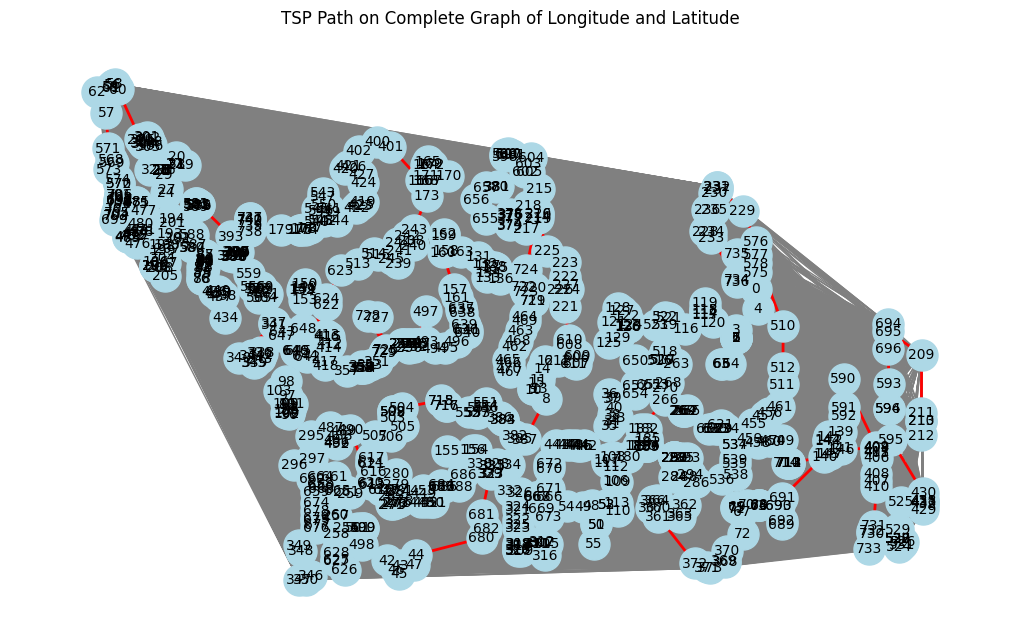

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic

# Read the CSV file
data = pd.read_csv("D:/PathPlanning_Data.csv")

# Select the relevant features
features = data[['Median Longitude', 'Median Latitude']]

# Create a complete graph
G = nx.complete_graph(len(features))

# Calculate distances and set as edge weights
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        loc1 = (features.iloc[i]['Median Latitude'], features.iloc[i]['Median Longitude'])
        loc2 = (features.iloc[j]['Median Latitude'], features.iloc[j]['Median Longitude'])
        distance = geodesic(loc1, loc2).kilometers
        G.add_edge(i, j, weight=distance)

# Solve the TSP
tsp_path = nx.approximation.traveling_salesman_problem(G, cycle=True)

# Extract the positions of the nodes
positions = {i: (features.iloc[i]['Median Longitude'], features.iloc[i]['Median Latitude']) for i in range(len(features))}

# Draw the graph with the TSP path
plt.figure(figsize=(10, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
path_edges = [(tsp_path[i], tsp_path[i + 1]) for i in range(len(tsp_path) - 1)]
nx.draw_networkx_edges(G, pos=positions, edgelist=path_edges, edge_color='red', width=2)

# Add titles and labels
plt.title('TSP Path on Complete Graph of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


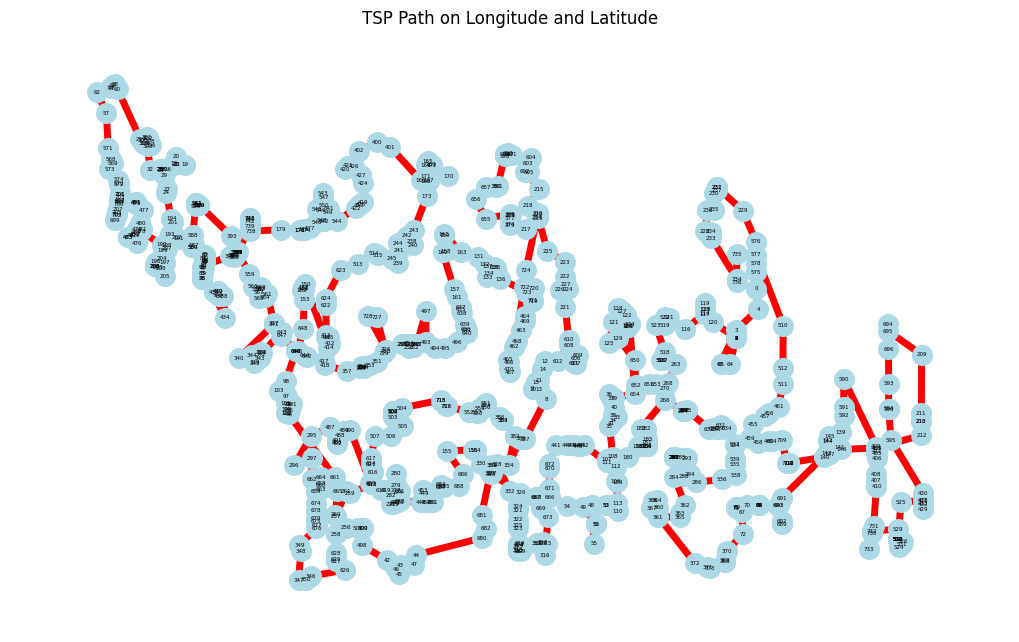

Total TSP path distance: 108.57 km
Starting node: 0, Ending node: 743


In [2]:
total_distance = 0
for i in range(len(tsp_path) - 1):
    total_distance += G[tsp_path[i]][tsp_path[i + 1]]['weight']

positions = {i: (features.iloc[i]['Median Longitude'], features.iloc[i]['Median Latitude']) for i in range(len(features))}

# Draw the TSP path
plt.figure(figsize=(10, 6))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', node_size=200, font_size=4, edgelist=[])
path_edges = [(tsp_path[i], tsp_path[i + 1]) for i in range(len(tsp_path) - 1)]
path_edges.append((tsp_path[-1], tsp_path[0]))  # Complete the cycle
nx.draw_networkx_edges(G, pos=positions, edgelist=path_edges, edge_color='red', width=5)

# Add titles and labels
plt.title('TSP Path on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

start_node = tsp_path[0]
end_node = len(tsp_path)-1
print(f'Total TSP path distance: {total_distance:.2f} km')
print(f'Starting node: {start_node}, Ending node: {end_node}')